In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("week2_dataset.xlsx")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# User Engagement Analysis

In [3]:
#Top users per session number 
df["Session Number"] = df.groupby('MSISDN/Number')['Bearer Id'].transform("count" )
df[['MSISDN/Number','Session Number']].sort_values(by = 'Session Number', ascending= False).head(10)

,MSISDN/Number,Session Number
50161,3.362632e+10,18.0
56316,3.362632e+10,18.0
50321,3.362632e+10,18.0
50013,3.362632e+10,18.0
50014,3.362632e+10,18.0
51642,3.362632e+10,18.0
50023,3.362632e+10,18.0
50029,3.362632e+10,18.0
50032,3.362632e+10,18.0
53134,3.362632e+10,18.0


In [4]:
#Top 10 users engaged in session duration
df["session duration"] = df.groupby('MSISDN/Number')['Dur. (ms).1'].transform("sum" )
df[['MSISDN/Number','session duration']].sort_values(by = 'session duration', ascending= False).head(10)

,MSISDN/Number,session duration
125275,3.362578e+10,1.855376e+10
125007,3.362578e+10,1.855376e+10
125020,3.362578e+10,1.855376e+10
125015,3.362578e+10,1.855376e+10
126484,3.362578e+10,1.855376e+10
129511,3.362578e+10,1.855376e+10
125562,3.362578e+10,1.855376e+10
125035,3.362578e+10,1.855376e+10
125005,3.362578e+10,1.855376e+10
125106,3.362578e+10,1.855376e+10


In [6]:
#total download (DL) and upload (UL) data
df['Total_downloads'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

In [7]:
#Top 10 customer engaged in downloads
df["Downloads engagement"] = df.groupby('MSISDN/Number')['Total_downloads'].transform("sum" )
df[['MSISDN/Number','Downloads engagement']].sort_values(by = 'Downloads engagement', ascending= False).head(10)

,MSISDN/Number,Downloads engagement
41003,3.361489e+10,8.846226e+09
25016,3.361489e+10,8.846226e+09
25092,3.361489e+10,8.846226e+09
25044,3.361489e+10,8.846226e+09
25225,3.361489e+10,8.846226e+09
27763,3.361489e+10,8.846226e+09
25418,3.361489e+10,8.846226e+09
29071,3.361489e+10,8.846226e+09
25030,3.361489e+10,8.846226e+09
25952,3.361489e+10,8.846226e+09


In [8]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [9]:
df['Total_downloads'].fillna(value = df['Total_downloads'].mean(), inplace = True)
df['Dur. (ms).1'].fillna(value = df['Dur. (ms).1'].mean(), inplace = True)
df['Session Number'].fillna(value = df['Session Number'].mean(), inplace = True)

In [10]:
#normalizing the engagement metrics
x1= df[['Session Number','Dur. (ms).1', 'Total_downloads']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_xscaled = pd.DataFrame(x_scaled,columns = ['xDr sessions', 'Session Duration', 'Total Downloads'])
df_xscaled.tail()

,xDr sessions,Session Duration,Total Downloads
149996,0.000000,0.040000,0.650301
149997,0.058824,0.049038,0.730105
149998,0.000000,0.049188,0.645873
149999,0.000000,0.049005,0.401893
150000,0.050583,0.052622,0.503553


In [11]:
#run k_mean
kmean = KMeans(n_clusters=3, init='k-means++', random_state=22)
kmean.fit(df_xscaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [12]:
#appending kmean labels to a normalized dataframe of engagement metrics
df_xscaled['kmean_labels'] = kmean.labels_
df_xscaled.tail()

,xDr sessions,Session Duration,Total Downloads,kmean_labels
149996,0.000000,0.040000,0.650301,0
149997,0.058824,0.049038,0.730105,1
149998,0.000000,0.049188,0.645873,0
149999,0.000000,0.049005,0.401893,0
150000,0.050583,0.052622,0.503553,0


In [13]:
#Compute the minimum, maximum, average & total non- normalized metrics for each cluster
x1['kmeans_labels'] = kmean.labels_
x1.head()

C:\Users\Jeannette\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Session Number,Dur. (ms).1,Total_downloads,kmeans_labels
0,2.0,1.823653e+09,345629377.0,2
1,2.0,1.365104e+09,707185356.0,1
2,1.0,1.361763e+09,307690973.0,2
3,1.0,1.321510e+09,889352748.0,1
4,1.0,1.089009e+09,607681403.0,0


In [25]:
x1.to_csv('C:/Users/jeannette/Desktop/engagement_metrics.csv')

In [14]:
#min, max,mean,sum for downloads metrics
downloads_metrics = x1.groupby('kmeans_labels').agg({'Total_downloads': ['min','max','mean','sum']})
downloads_metrics.reset_index()

kmeans_labels Total_downloads                                         
                            min          max          mean           sum
0             0     353350506.0  635845814.0  4.947982e+08  2.482996e+13
1             1     635613283.0  955984776.0  7.771472e+08  3.898326e+13
2             2      28956107.0  353516867.0  2.124971e+08  1.055197e+13

In [15]:
#min, max,mean,sum for session duration metrics
session_metrics = x1.groupby('kmeans_labels').agg({'Dur. (ms).1': ['min','max','mean','sum']})
session_metrics.reset_index()

kmeans_labels Dur. (ms).1                                          
                        min           max          mean           sum
0             0   7142988.0  1.772931e+09  1.048165e+08  5.259902e+12
1             1   7146574.0  1.859328e+09  1.044739e+08  5.240621e+12
2             2   7189000.0  1.859336e+09  1.045361e+08  5.190947e+12

In [16]:
#min, max,mean,sum for session number metrics
sessionnbr_metrics = x1.groupby('kmeans_labels').agg({'Dur. (ms).1': ['min','max','mean','count']})
sessionnbr_metrics.reset_index()

kmeans_labels Dur. (ms).1                                   
                        min           max          mean  count
0             0   7142988.0  1.772931e+09  1.048165e+08  50182
1             1   7146574.0  1.859328e+09  1.044739e+08  50162
2             2   7189000.0  1.859336e+09  1.045361e+08  49657

In [17]:
download_cluster = df_xscaled.groupby('kmean_labels').agg({'Total Downloads': ['sum']})
download_cluster.columns = ['download Cluster']
download_cluster

,download Cluster
kmean_labels,
0,25217.007050
1,40485.009022
2,9831.512239


In [18]:
#aggregating clusters per total downloads
download_cluster = df_xscaled.groupby('Total Downloads').agg({'kmean_labels': ['sum']})
download_cluster.columns = ['download Cluster']
download_cluster.head()

,download Cluster
Total Downloads,
0.000000,2
0.002305,2
0.004631,2
0.004983,2
0.005441,2


In [19]:
#aggregating clusters persession duration
session_cluster = df_xscaled.groupby('Session Duration').agg({'kmean_labels': ['sum']})
session_cluster.columns = ['Session Cluster']
session_cluster.head()

,Session Cluster
Session Duration,
0.000000,0
0.000002,1
0.000025,2
0.000038,2
0.000062,1


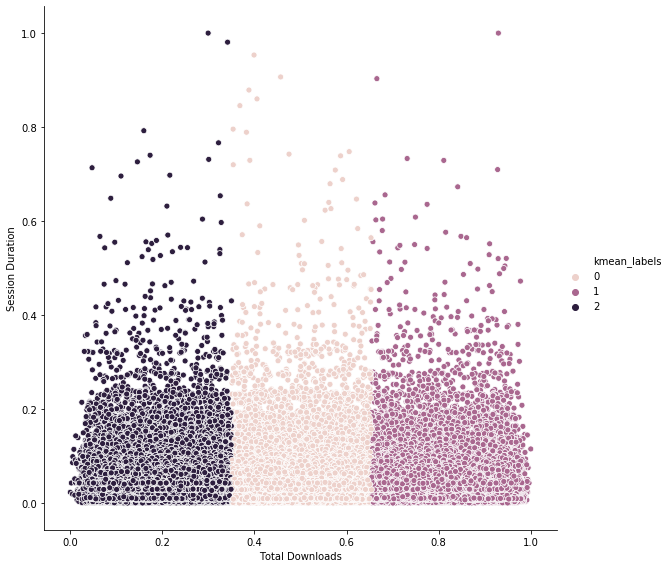

In [20]:
#user engagement distribution per cluster
sns.relplot(x='Total Downloads', y='Session Duration', height= 8, aspect=1, hue="kmean_labels", data= df_xscaled)

In [22]:
#group users in k engagement clusters based on the engagement metrics: 
n_cluster = [1,2,3,4,5,6,7,8,9]
kmean_out = []
for n in n_cluster:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=22)
    kmeans.fit(df_xscaled)
    kmean_out.append(kmeans.inertia_)

In [23]:
kmean_out

[111420.53144642698,
 29738.443248583008,
 2325.3258674465,
 2031.1196364851648,
 1739.1745364059968,
 1454.053064227447,
 1301.4688592179198,
 1151.1544445366103,
 1001.4802596275492]

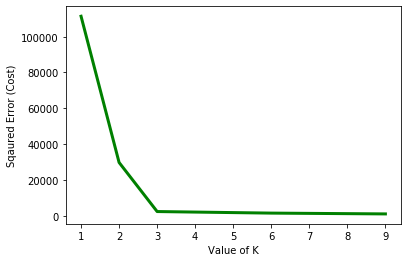

In [24]:
# plot the cost against K values to check the optimal value
plt.plot(n_cluster, kmean_out, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()